http://psh01com1hcom02:8885/tree?token=6b16ccaa3c414baf40fefa8b99b56a0132cb81aae64d0542

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn

model_name = "best_model_0.82_corr"
output_dir = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/transformer_testing_output"
model_training_dir = os.path.join(output_dir, model_name)

training_log_file = os.path.join(model_training_dir, "training_log.csv")
training_log_df = pd.read_csv(training_log_file, header=0, index_col=0)
            


In [1]:
def plot_pearson_corr_across_epochs(df):
    fig = plt.figure(figsize=(7, 6))
    plt.plot(df.index, df["Pearson"], linewidth=2, label="Pearson Correlation")

    plt.title("mESC Chr19 Pearson Correlation Change Across Training", fontsize=14)
    plt.ylim((0,1))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Pearson Correlation", fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    
    return fig

fig = plot_pearson_corr_across_epochs(training_log_df)
fig.savefig(os.path.join(model_training_dir, "eval_results_pearson_corr.png"), dpi=300)
fig.show()

NameError: name 'training_log_df' is not defined

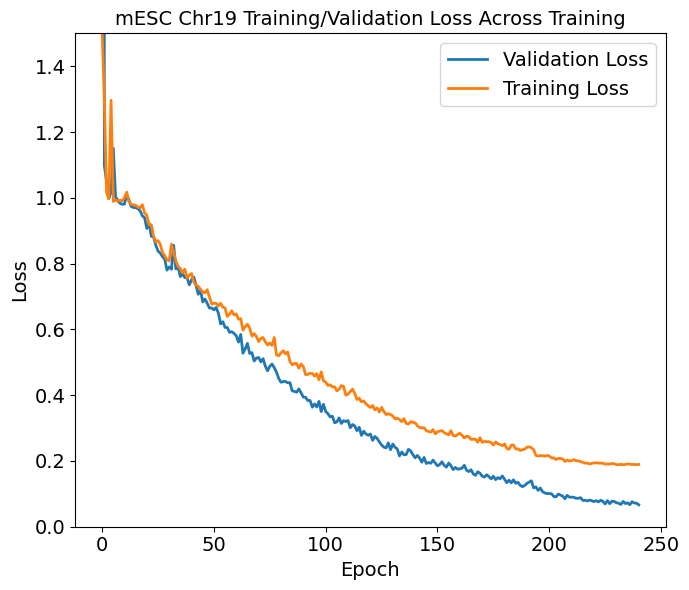

In [6]:
def plot_train_val_loss(df):
    fig = plt.figure(figsize=(7, 6))
    plt.plot(df.index, df["Train Loss"], linewidth=2, label="Validation Loss")
    plt.plot(df.index, df["Val Loss"], linewidth=2, label="Training Loss")

    plt.title("mESC Chr19 Training/Validation Loss Across Training", fontsize=14)
    plt.ylim((0,1.5))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    
    return fig
    
fig = plot_train_val_loss(training_log_df)
fig.savefig(os.path.join(model_training_dir, "eval_results_training_loss.png"), dpi=300)
fig.show()

<BarContainer object of 50 artists>

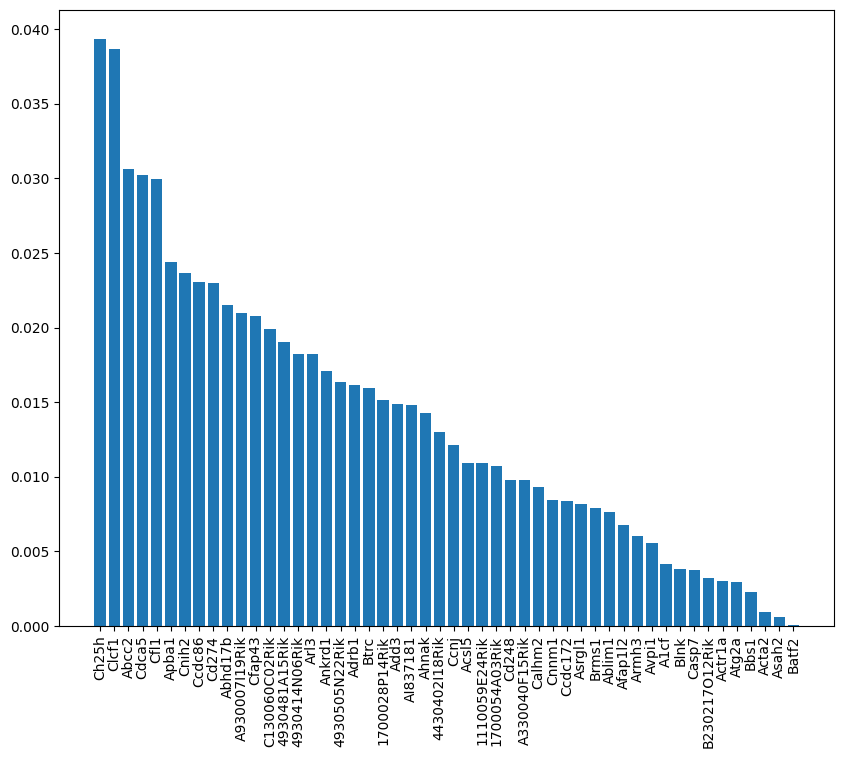

In [3]:
tf_imp_dir = os.path.join(model_training_dir, "tf_gradient_attributions")
            
tf_importance_df = pd.read_csv(os.path.join(tf_imp_dir, "tf_importance_matrix_exp.csv"), header=0, index_col=0)

fig = plt.figure(figsize=(10,8))

selected_tf_row = tf_importance_df.loc["Amyb"]
selected_tf_row = selected_tf_row.iloc[:50].sort_values(ascending=False)

plt.xticks(rotation=90, fontsize=10)
plt.bar(x=selected_tf_row.index, height=selected_tf_row)
